# Chapter III - Finding a Solution for the Infinite Grid of Resistors with Fourier Series

### The Equations for our Infinite Grid Network

Lets look again onto our infinite grid of resistors:

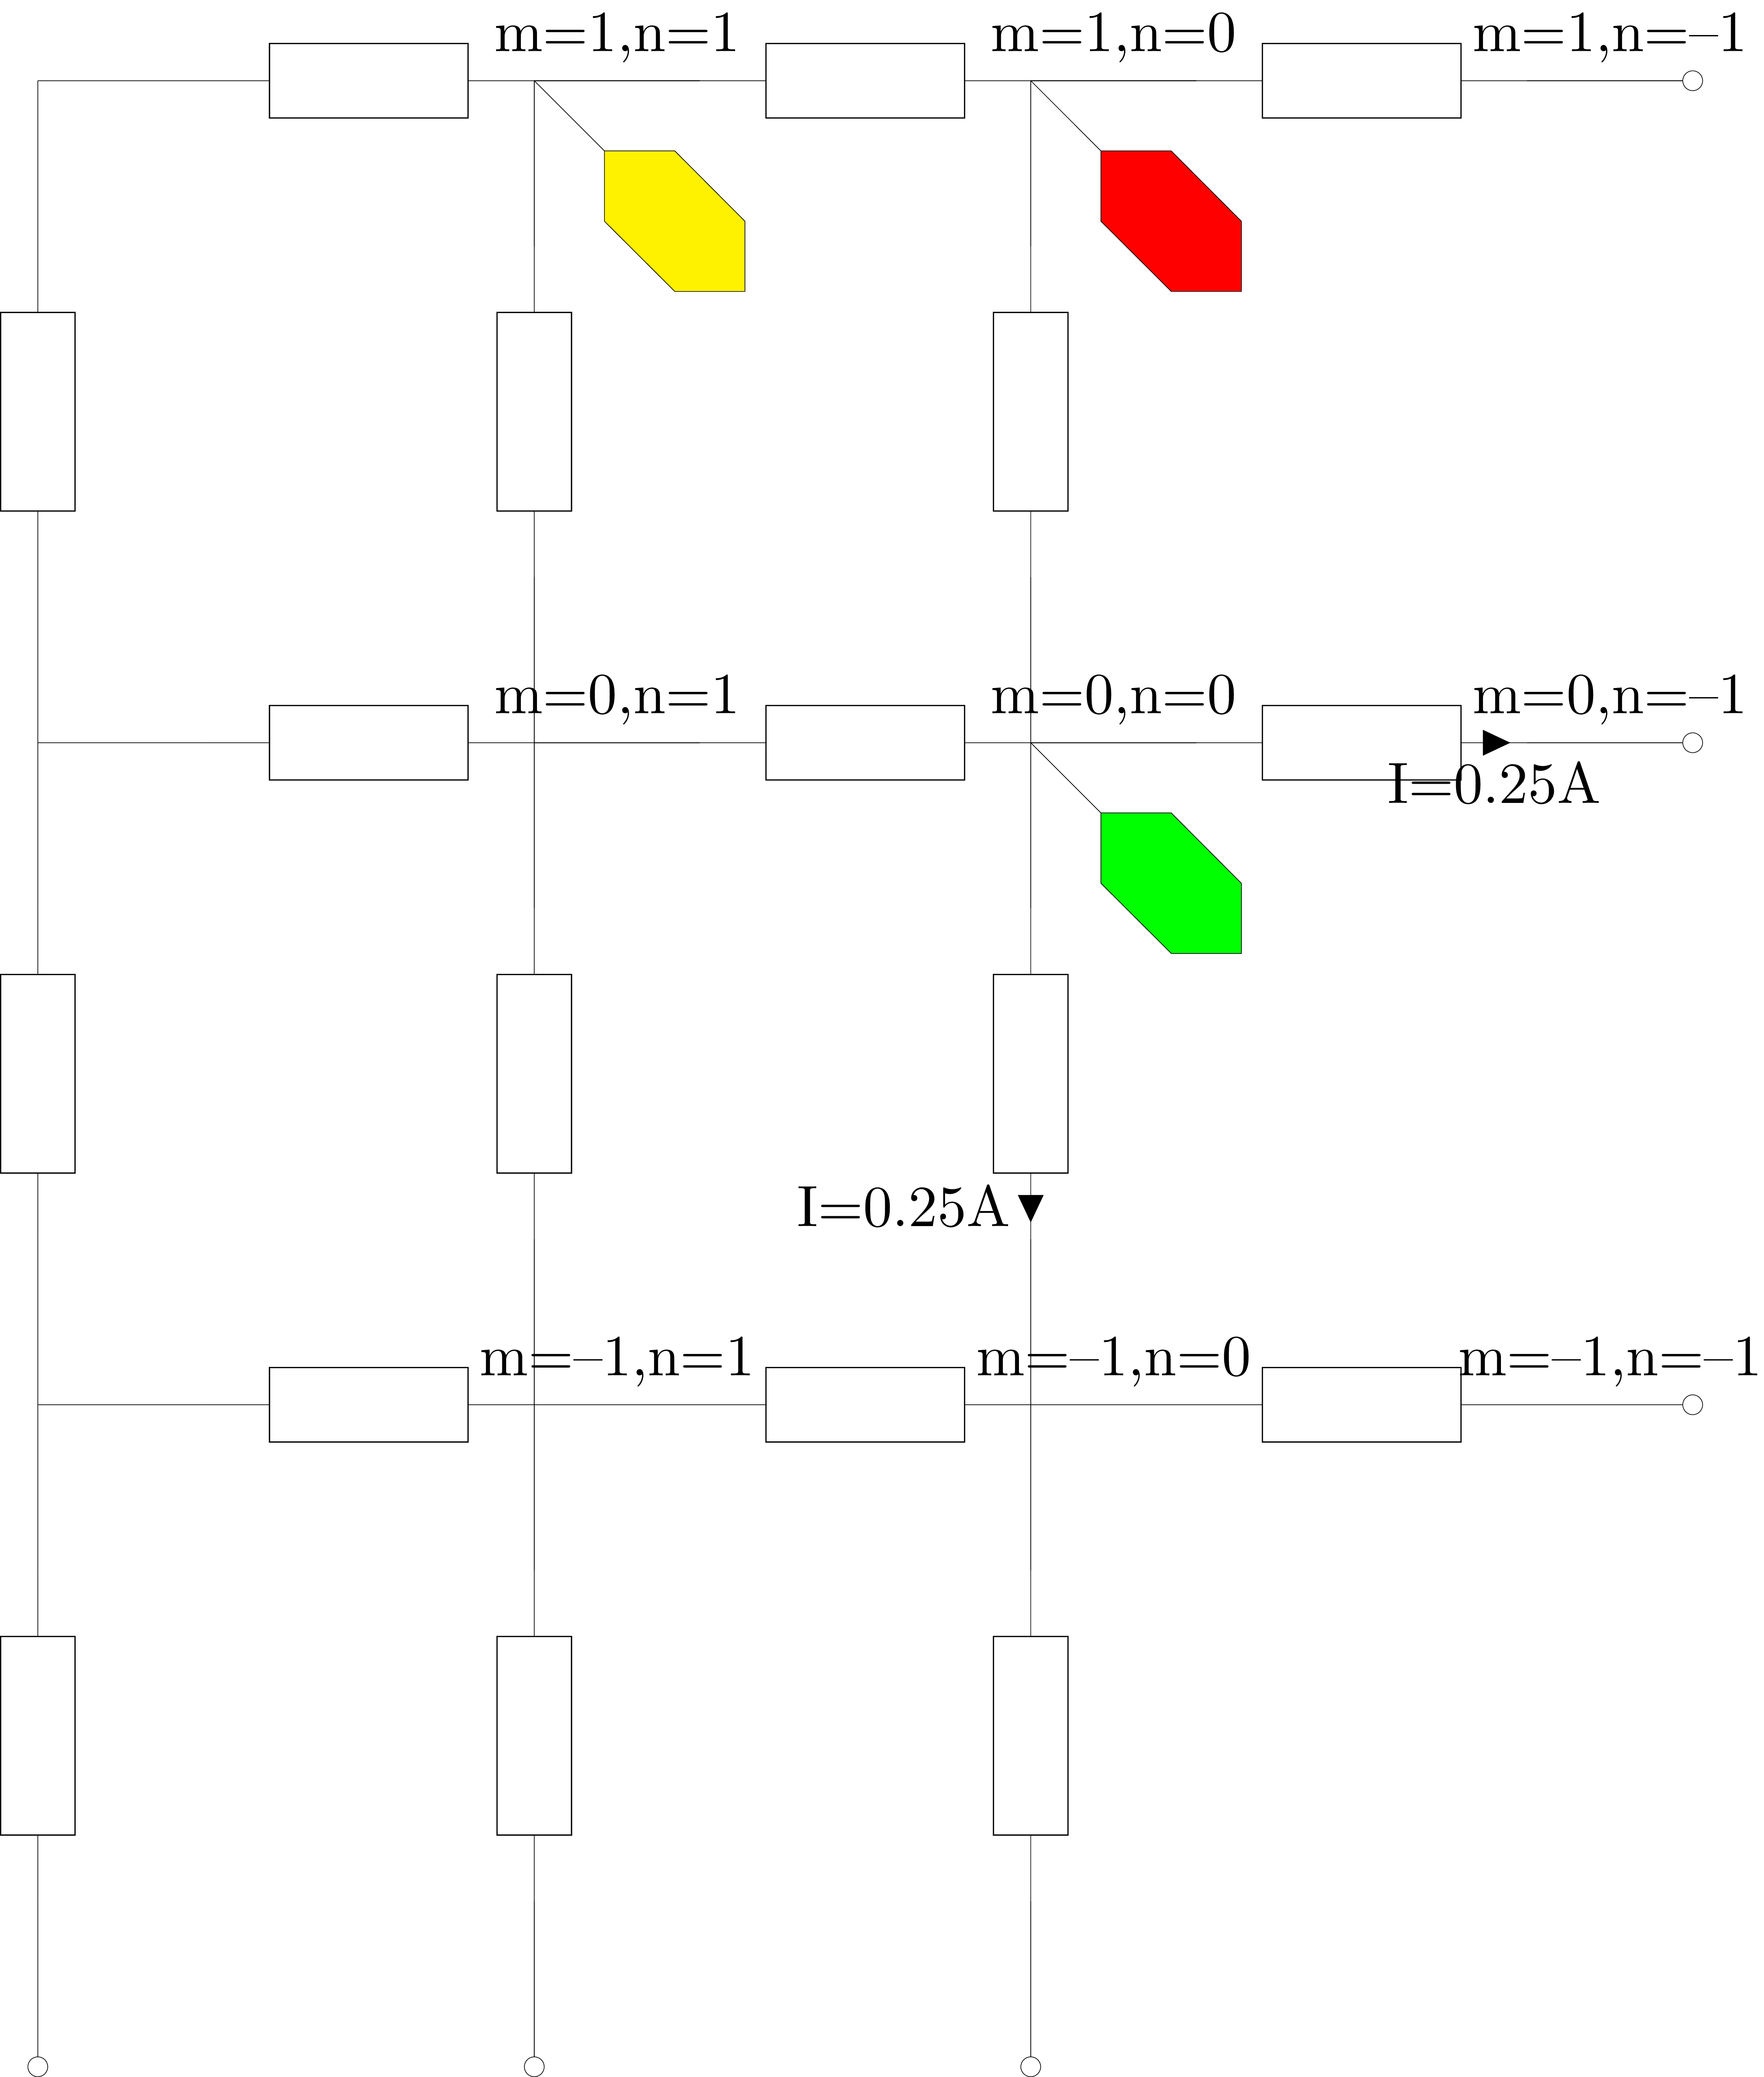

In [1]:
from chapter0drawgrid import drawgrid
drawgrid(3)

$$ -4*U_{m,n}+U_{m+1,n}+U_{m-1,n}+U_{m,n+1}+U_{m,n-1} = -I_{in}*R = -1 $$

In order not to raise any confusion with the step function I will further use F as a symbol. for our main function:

$$  -4*F_{m,n}+F_{m+1,n}+F_{m-1,n}+F_{m,n+1}+F_{m,n-1} = -I_{in} \$$ 


My initial hope was that the mechanisms of the Z-Transform or the generating functions wouldl provide an easy way to solve this. Given how well that worked in the one dimensional case one would expect that this could also work here. Unfortunately things are not that easy in 2 Dimensions as we will soon see. 

Extending the concept of Z-Transform or generating functions to 2 dimensions itself is easy. For the generating functions we would have:

$$ f(x,y)= c_{0,0} + c_{1,0} x + c_{0,1} y + c_{1,1} x y + c_{2,0} x^2 + c_{2,1} x^2 y + \ldots ..  $$   

where the 

$$ c_{m,n} = F_{m,n} $$ 


So we have the generating functions in 2 variables x and y and those coefficients of the terms \$ x^{m} y^{n} \$ represent values \$ F_{m,n} \$ on our grid. We still have the issue that we want the values in all 4 quadrants but due to the symetric we could initially focus on one of the quadrants. 

Multiplication with \$ x \$ represents a shift from \$ F_{m,n} \$ to  \$ F_{m+1,n} \$



So with the same logic as before we translate 

$$ -4 F_{m,n}+F_{m+1,n}+F_{m-1,n}+F_{m,n+1}+F_{m,n-1} $$

into 

$$ ( -4 + x + \frac{1}{x} + y + \frac{1}{y} ) F $$ 


So but now we are kind of stuck. What worked so well in the 1D case does not work here anymore. In the case where we do not have difference equations but differential equations it is much easier: 

### Looking at the case of differential equations in 3D 

E.g. A point source of charge creats an electric field that is pointing away from a positive charge in all directions. 

$$ E = \frac{1}{\epsilon_0} \cdot \frac{q}{4\pi R^2 } $$ 

The *flow* of the fields spreads into space and at distance are is divided over the surface of the ball that is \$ A=4\pi R^2  \$

The potential then would be the integral over the E fields and thus would be proportional to 


$$ \frac{1}{|R|} $$ 

Of course the Physical Phenomen here is a different one then in our case where we have an electric current and here we have electric flux. But The principle is only dependent on the mathematics behind this. It e.g. also is the same for gravity.

Also the surface does not need to be symetric. Any integral over the divergence on the surface will give the sum of the sources of flux within the boundary of the surfe. This is known as:

* [Gauss's Law (wikipedia)](https://en.wikipedia.org/wiki/Gauss%27s_law)
* [Divergence Theorem (wikipedia)](https://en.wikipedia.org/wiki/Divergence_theorem)

The reason we have choosen symetric surfaces (like the ball around the charge) is that then we know that the value is the same on all points of the surface and we only need to divide the flux by the surface.

We could also cut a boundary anywhere in our resistor grid. E.g. on a quadratic box between the points of \$ |m| = m_{box} \$ and \$ |m| = m_{box}+1 \$ and we would immeditately know that the current flowing out is 1A and thus the difference between the sums of the potential is 1. Witht the symetric we could even find that on each surface of the quadratic box the sum is 0.25. But we will not get much further then that.




# The case of the  differential equations in 2D

$$ -1 = 2\pi \cdot R \frac{dU(R)}{dR}=2\pi \cdot R \cdot U' $$

$$ U' = \frac{-1}{2\pi R} $$

$$ U = -\frac{1}{2\pi} \cdot ln(R) $$ 

Thus we should expect that in our discret case the function F also increases proportional to 
\$ ln( \sqrt{m^2 + n^2})  \$  for larger values of m and n

# Green's Function 

Now since this type of difference and differential equations often appear in physics and mathematics we are not the first one to solve them. The general problem is to find a function G so that :

$$ L G(\vec x) = \delta(\vec x) $$ 

Where L is some linear operator, \$ \vec x \$ is the position and \$ \delta(\vec x ) \$ is the dirac delta. In our case the operator is the discrete \$ \nabla^2 \$ and and we are searching for a solution that only has the input current in the center \$ I_{m,n} = \delta_{m,n} \$ that is \$ I_{0,0}=1  \$ only for \$ m=n=0 \$ 

\$ G \$ is the Green's function for our problem. Due to the linearity of the system we can then calculate any output that fits a superposition of all the inputs. But in our case we only have the input in the middle anyways. So what we are searching for *is* the Green's function!

So our search is for

$$ F_{m,n} = G(m,n) \$$


In [7]:
x,y=symbols("x y")

In [8]:
-4+x+1/x+y+1/y  


Our characteristic equation has one obvious solutions: \$ x=y=1 \$. But the corresponding generating function 

$$ f(x,y) = \frac{1}{1-x} \cdot \frac{1}{1-y} $$

This gives all \$ F_{m,n} = 1 \$ 

is a rather trivial solution where the potential is a **constant** everywhere. So this solves the problem almost everywhere but not in the middle. 


# Constructing the Green's Function

Now obviously a solution exists in the real world as the current is flowing. But how to construct it. Where *construct* is the right approach. Lets take functions that do *not* solve our equation and try to *combine* them in a way that they do!

If we feed in functions of the type 

$$ F_{m,n} = Ae^{z_1\cdot m}e^{z_2\cdot n} = Ae^{z_1\cdot m + z_2\cdot n} \$$ 

With some complex numbers \$ z_1, z_2 \in \mathbb{C}  \$ 

Then the shift by on position along the m or the n axis will result in multiplication by \$ e^{z_1} \$.  

Also due to the symetrie if \$ F_{m,n} = F_{-m,n} = F_{m,-n} = F_{n,m} \$ we might restrict ourselfs to complex conjugate pairs of that function that give aus even results.

Now comes a small leap of faith: Since we know that a lot of functions can be expressed as fourier series we could limit ourselfs to the case where \$z_1= i\cdot\alpha \$ and \$z_2= i \cdot \beta \$


With Eulers identity the translation along e.g. the m-axis becomes:

$$ 2 \cdot cos(\alpha) = e^{i \alpha} + e^{-i \alpha} $$


$$ e^{i m \alpha} * cos(\alpha) = \frac{1}{2} \cdot ( e^{i (m+1) \alpha} + e^{i (m-1) \alpha}) $$

Note how multiplication with cos does both a negative and a positive shift here. So for functions of the type  mentioned aboe  \$ we get 2 terms for one.

$$ LF = F \cdot ( 4−2 cos(\alpha)− 2 cos(\beta) )  $$







In [4]:
from sympy import * 
z1,z2,m,n,alpha,beta=symbols("z1 z2 m n alpha,beta")



In [5]:
def Loperate(Fin):
    res = -4*Fin
    res += Fin.subs(m,m-1)
    res += Fin.subs(m,m+1)
    res += Fin.subs(n,n-1)
    res += Fin.subs(n,n+1)
    return res


In [6]:
r=Loperate(exp(I*(m)*alpha)*exp(I*(n)*beta) )
r

So we have seen what happens when we send in a single exponential function:

$$ F_{m,n} = Ae^{i \alpha \cdot m}e^{i \beta \cdot n} = Ae^{i \cdot (\alpha m + \beta  n)} \$$ 

For a certain \$\alpha\ $ and \$\beta \$ 

Now lets combine **many** surch function. Indeed lets run \$\alpha\ $ and \$\beta \$  from \$ -\pi \$ to \$ +\pi \$ each! And of course we choose an individual A for each of the pairs \$ A(\alpha,\beta) \$ 

Putting together infinitely many such function is no longer summing up but an integral. And since we have to run both \$\alpha\ $ and \$\beta \$  to all its values we need 2 nested integrals:


$$ F_{m,n} =\frac{1}{4\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta A(\alpha,\beta) e^{i \cdot (\alpha m + \beta  n)}    $$

Do not worry about the \$ 4\pi^2 \$ this is only to divide by the integration length ( \$ 2\pi \$ for both integrands ). We could have put that constant into the choice for \$ A(\alpha,\beta) \$ as well.

Or if we take into account the symetry in \$ F_{m,n} \$ then we can limit ourself to cos:

$$ F_{m,n} = \frac{1}{4\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta \cdot A(\alpha,\beta) \cdot cos(\alpha m ) \cdot cos(\beta  n)    $$



### But this looks like how we would calculate the coefficients in a Fourier Series

Bingo! This would be how we calculate the coefficients for a Fourier series that represents the 2D funtion $\ f(\alpha,\beta) = A(\alpha,\beta) \$

Every well behaved periodic function can be represented as a Fourier Series, and this is how we would calculate the coefficients of this series. So we can view the right hand side as a function where we can plug in m and n and then get the a potential in our resistor network or we can see it as the Fourier Transform of a function.

One Question that arises is whether or not this even converges. Since in our case the higher frequencies will grow to infinite this does not look extremely dangerous. But lets still try it and pretend it works:

Lets see what happens when we plug in our superposition of infinitly many cosine functions into our operation:

We had:

$$ 𝐿𝐹=𝐹⋅(4−2𝑐𝑜𝑠(𝑥)−2𝑐𝑜𝑠(𝑦)) $$

Thus if we put swap the L operation with the integration we get the term:

$$ f(\alpha,\beta) \cdot ( 4-2cos(\alpha)-2\cos(\beta) )$$  

$$ I_{m,n} = \frac{1}{4\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta \cdot f(\alpha,\beta) \cdot cos(\alpha m ) \cdot cos(\beta  n) \cdot ( 4-2cos(\alpha)- 2cos(\beta))     $$

Now for \$ I_{m,n} = \delta(m,n) \$ we want a  function that has only 1 1 coefficient at the zero frequency. So the the function would be 1.

Thus if we we are searching for the function that solves our equation where we inject the current of 1 we get:

$$ f(\alpha,\beta) \cdot ( 4-2cos(\alpha)- 2cos(\beta) ) = 1 $$

or

$$ f(\alpha,\beta) = \frac{1}{4-2cos(\alpha)- 2cos(\beta)}  $$

So if we transfer this back into the realm of coefficients we get:

$$ F_{m,n} = \frac{1}{8\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta \cdot \frac{ cos(\alpha m ) \cdot cos(\beta  n) }{2-cos(\alpha)- cos(\beta)} $$

since the denominator goes to zero for \$ \alpha=\beta=0 \$ whe have a pole in our function. We can *fix* this by subtracting a constant (that is not dependent on m or n. This works since our result is a potential and we can add a constant anyways. So the fixed version would be:


$$ G_{m,n} = \frac{1}{8\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta \cdot \frac{ cos(\alpha m ) \cdot cos(\beta  n) - 1 }{2-cos(\alpha)- cos(\beta)} $$


This ensure that the nominator also goes to zero when the denominator goes to zero and other then that only contributes a constant that is not dependent on m or n. In order to inject a current we need an infinit voltage anyways and would have a potential of zero at infinity. The -1 term reverses that: We start with a zero potential in the midle. For the calculation of resistance we need to inject 2 currents anyways and then calculate the difference in potential. So this term will cancel below. 

So i change the name of the function to G here. Since this is our solution. The Green's function!




### Calculating the Resistance from the Potential

If we use the same trick that we used when we calculated the resistance of the neighbouring nodes we inject a current at 0,0 and an oposit current at m,n. The potential that is created by the first one at m,n is the same as the one that is created by the second one at 0,0 and thus the voltage is twice the potential that the Green's function gives us. Our current was -1A. So the resistance is:

$$ R_{m,n-0,0} = R_{m,n} = \frac{U}{I} = \frac{2 \cdot G_{m,n}}{1} $$ 

$$ R_{m,n} = \frac{1}{4\pi^2} \int_{-\pi}^{+\pi} d\alpha \int_{-\pi}^{+\pi} d\beta \cdot \frac{1- cos(\alpha m ) \cdot cos(\beta  n)}{2-cos(\alpha)- cos(\beta)} $$

Before we solve the integral analytically lets check if it works numerically:


In [1]:
import numpy as np

eps=1e-10
g=(eps+1-cos(m*alpha)*cos(n*beta))/(eps+2-cos(alpha)-cos(beta))
g

NameError: name 'cos' is not defined

The eps value is only here to avoid a difision by zero but should not change the resut by much

In [2]:
import numpy as np

def gintegrate(mval,nval):
    eps=1e-14
    g=(eps+1-cos(m*alpha)*cos(n*beta))/(eps+2-cos(alpha)-cos(beta))
    gg=g.subs(m,mval).subs(n,nval)
    ggfun = lambdify( [alpha,beta], gg, "numpy" )
    a=np.linspace(-np.pi,np.pi,2001)
    b=np.linspace(-np.pi,np.pi,2001)
    mesha,meshb=np.meshgrid(a,b)
    #print(np.shape(meshb))
    res=ggfun(mesha,meshb)
    #print(np.shape(res))
    r2=np.trapz(res, a, axis=1)
    #print(np.shape(r2))
    r3=np.trapz(r2,b,axis=0)
    return r3/4/np.pi**2

In [3]:
gintegrate(0,0)

NameError: name 'cos' is not defined

In [4]:
gintegrate(0,1)

NameError: name 'cos' is not defined

In [65]:
gintegrate(1,0)

In [66]:
gintegrate(1,1)

In [68]:
N(2/pi)

In [69]:
r=[  [ gintegrate(i,j) for j in range(5) ]  for i in range(5)]


In [74]:
np.round(r,5)

array([[0.     , 0.5    , 0.72676, 0.86056, 0.95399],
       [0.5    , 0.63662, 0.77324, 0.88075, 0.96479],
       [0.72676, 0.77324, 0.84883, 0.92441, 0.99192],
       [0.86056, 0.88075, 0.92441, 0.97615, 1.02788],
       [0.95399, 0.96479, 0.99192, 1.02788, 1.06709]])

**Nice!** We have found our function. The only thing left to do is solve the integral numerically to get our \$ \frac{2}{\pi} \$ value not only as a numeric approximation but as a analytic result!


In [6]:
4/np.pi-0.5

0.7732395447351628

In [1]:
import numpy as np

def gintegrate(m,n):
    a=np.linspace(-np.pi,np.pi,2000)
    b=np.linspace(-np.pi,np.pi,2000)
    alpha,beta=np.meshgrid(a,b)
    g=(1-np.cos(m*alpha)*np.cos(n*beta))/(2-np.cos(alpha)-np.cos(beta))
    r2=np.trapz(g, a, axis=1)
    r3=np.trapz(r2,b,axis=0)
    return r3/4/np.pi**2

In [2]:
gintegrate(0,0)

0.0

In [3]:
gintegrate(0,1)

0.5

In [4]:
gintegrate(1,0)

0.5

In [7]:
gintegrate(1,1)

0.63661977236744

In [8]:
2/np.pi

0.6366197723675814